In [113]:
import pandas as pd
data = pd.read_csv('./dataset.csv', encoding='ISO-8859-1')
data.head()

# x y:no

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority
0,1,IN-2011-47883,2011/1/1,2011/1/8,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
1,2,IN-2011-47883,2011/1/1,2011/1/8,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-PA-10001968,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.1,15.342,1.80,Medium
2,3,IN-2011-47883,2011/1/1,2011/1/8,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium
3,4,IT-2011-3647632,2011/1/1,2011/1/5,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,5,HU-2011-1220,2011/1/1,2011/1/5,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High


- 数据清洗


In [114]:
# 根据业务需要提取数据
# shipdata发货日期
# orderdata下单日期
data['ShipDate'] = pd.to_datetime(data['ShipDate'])
data['OrderDate'] = pd.to_datetime(data['OrderDate'])
# 时间间隔
data['interval'] = (data.ShipDate - data.OrderDate).dt.total_seconds()
data[data.interval < 0]


,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,interval
14,15,ES-2011-4869686,2011-01-03,2011-01-01,Standard Class,DD-13570,Dorothy Dickinson,Consumer,Southport,England,...,Furniture,Bookcases,"Dania Corner Shelving, Traditional",854.490,7,0.0,290.430,12.56,Medium,-172800.0
490,490,TU-2011-7850,2011-02-05,2011-01-12,Standard Class,AW-840,Anthony Witt,Consumer,Gaziantep,Gaziantep,...,Furniture,Furnishings,"Advantus Light Bulb, Black",8.028,1,0.6,-2.622,0.55,Low,-2073600.0
20868,20867,ES-2013-5588419,2013-02-14,2013-01-19,Second Class,RF-19840,Roy Französisch,Consumer,Solihull,England,...,Office Supplies,Binders,"Avery Binding Machine, Durable",151.020,3,0.0,9.000,6.22,Medium,-2246400.0
35672,35670,TU-2014-9870,2014-03-13,2014-01-20,Standard Class,QJ-9255,Quincy Jones,Corporate,Izmir,Izmir,...,Office Supplies,Envelopes,"Ames Clasp Envelope, with clear poly window",8.592,2,0.6,-10.368,0.68,Low,-4492800.0


In [115]:
data.drop(index=data[data.interval < 0].index, inplace=True)
data
data['interval'] = data.ShipDate - data.OrderDate
data.head()

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,interval
0,1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,7 days
1,2,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.1,15.342,1.80,Medium,7 days
2,3,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,7 days
3,4,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,4 days
4,5,HU-2011-1220,2011-01-01,2011-01-05,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,4 days


In [116]:
# 提取数据时,处理与业务流程不符合数据,售价为负
data[data.Sales < 0]

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,interval


In [117]:
data.shape

(51097, 25)

In [118]:
data.count()

RowID            51097
OrderID          51097
OrderDate        51097
ShipDate         51097
ShipMode         51086
CustomerID       51097
CustomerName     51097
Segment          51097
City             51097
State            51097
Country          51097
PostalCode        9962
Market           51097
Region           51097
ProductID        51097
Category         51097
Sub-Category     51097
ProductName      51097
Sales            51097
Quantity         51097
Discount         51097
Profit           51097
ShippingCost     51097
OrderPriority    51097
interval         51097
dtype: int64

In [119]:
data.isna().sum()

RowID                0
OrderID              0
OrderDate            0
ShipDate             0
ShipMode            11
CustomerID           0
CustomerName         0
Segment              0
City                 0
State                0
Country              0
PostalCode       41135
Market               0
Region               0
ProductID            0
Category             0
Sub-Category         0
ProductName          0
Sales                0
Quantity             0
Discount             0
Profit               0
ShippingCost         0
OrderPriority        0
interval             0
dtype: int64

In [120]:
data.describe()

,RowID,PostalCode,Sales,Quantity,Discount,Profit,ShippingCost,interval
count,51097.000000,9962.000000,51097.000000,51097.000000,51097.000000,51097.000000,51097.000000,51097
mean,25549.751668,55225.189319,246.568189,3.476036,0.143456,28.515431,26.385308,3 days 23:15:23.302737
std,14750.670508,32062.973837,487.774029,2.279122,0.213386,174.483766,57.286297,1 days 17:30:17.616193
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000,0 days 00:00:00
25%,12775.000000,23223.000000,30.816000,2.000000,0.000000,0.000000,2.610000,3 days 00:00:00
50%,25550.000000,57103.000000,85.140000,3.000000,0.000000,9.240000,7.800000,4 days 00:00:00
75%,38324.000000,90008.000000,251.100000,5.000000,0.200000,36.810000,24.450000,5 days 00:00:00
max,51098.000000,99301.000000,22638.480000,14.000000,1.500000,8399.976000,933.570000,7 days 00:00:00


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51097 entries, 0 to 51100
Data columns (total 25 columns):
RowID            51097 non-null int64
OrderID          51097 non-null object
OrderDate        51097 non-null datetime64[ns]
ShipDate         51097 non-null datetime64[ns]
ShipMode         51086 non-null object
CustomerID       51097 non-null object
CustomerName     51097 non-null object
Segment          51097 non-null object
City             51097 non-null object
State            51097 non-null object
Country          51097 non-null object
PostalCode       9962 non-null float64
Market           51097 non-null object
Region           51097 non-null object
ProductID        51097 non-null object
Category         51097 non-null object
Sub-Category     51097 non-null object
ProductName      51097 non-null object
Sales            51097 non-null float64
Quantity         51097 non-null int64
Discount         51097 non-null float64
Profit           51097 non-null float64
ShippingCost    

In [4]:
# 查看行列数量
data.shape
# 查看各个列的非空数据量
data.count()  # count 计算非NAN 值的数量， 按照字段计算
#NAN统计
data.isna().sum()
#数据整体描述
data.describe()
#数据信息
data.info()
# 简单浏览下数据
data.head() # qian5
data.tail() # hou5

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51097 entries, 0 to 51100
Data columns (total 25 columns):
RowID            51097 non-null int64
OrderID          51097 non-null object
OrderDate        51097 non-null datetime64[ns]
ShipDate         51097 non-null datetime64[ns]
ShipMode         51086 non-null object
CustomerID       51097 non-null object
CustomerName     51097 non-null object
Segment          51097 non-null object
City             51097 non-null object
State            51097 non-null object
Country          51097 non-null object
PostalCode       9962 non-null float64
Market           51097 non-null object
Region           51097 non-null object
ProductID        51097 non-null object
Category         51097 non-null object
Sub-Category     51097 non-null object
ProductName      51097 non-null object
Sales            51097 non-null float64
Quantity         51097 non-null int64
Discount         51097 non-null float64
Profit           51097 non-null float64
ShippingCost    

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,interval
0,1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,7 days
1,2,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.1,15.342,1.80,Medium,7 days
2,3,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,7 days
3,4,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,4 days
4,5,HU-2011-1220,2011-01-01,2011-01-05,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,4 days


object(label encoder) int float bool 
sum()
groupby()

In [122]:
data.RowID.unique().size
# 重复查看
data[data.RowID.duplicated()]

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,interval
141,141,ES-2011-4359424,2011-01-11,2011-01-15,Standard Class,DD-13570,Dorothy Dickinson,Consumer,Murcia,Murcia,...,Office Supplies,Labels,"Novimex File Folder Labels, Alphabetical",40.35,5,0.0,5.55,2.57,High,4 days
11566,11565,IN-2012-81581,2012-05-12,2012-05-16,Standard Class,BW-11200,Ben Wallace,Consumer,Canberra,Australian Capital Territory,...,Office Supplies,Storage,"Fellowes Shelving, Blue",57.84,1,0.0,16.17,10.68,High,4 days
32648,32646,CM-2013-4490,2013-12-12,2013-12-14,Second Class,CW-1905,Carl Weiss,Home Office,Bamenda,Nord-Ouest,...,Office Supplies,Storage,"Eldon Lockers, Blue",395.82,2,0.0,39.54,45.77,Medium,2 days


In [123]:
# 清洗RowID（行编号）
# RowID不重复的个数
# drop_duplicated()
data.RowID.unique().size
data[data.RowID.duplicated()]
data.drop(index=data[data.RowID.duplicated()].index, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51094 entries, 0 to 51100
Data columns (total 25 columns):
RowID            51094 non-null int64
OrderID          51094 non-null object
OrderDate        51094 non-null datetime64[ns]
ShipDate         51094 non-null datetime64[ns]
ShipMode         51083 non-null object
CustomerID       51094 non-null object
CustomerName     51094 non-null object
Segment          51094 non-null object
City             51094 non-null object
State            51094 non-null object
Country          51094 non-null object
PostalCode       9962 non-null float64
Market           51094 non-null object
Region           51094 non-null object
ProductID        51094 non-null object
Category         51094 non-null object
Sub-Category     51094 non-null object
ProductName      51094 non-null object
Sales            51094 non-null float64
Quantity         51094 non-null int64
Discount         51094 non-null float64
Profit           51094 non-null float64
ShippingCost    

In [124]:
data[data.ShipMode.isnull()]

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,interval
13666,13665,BU-2012-460,2012-07-21,2012-07-25,NaN,AH-30,Aaron Hawkins,Corporate,Pazardzhik,Pazardzhik,...,Office Supplies,Envelopes,"GlobeWeis Business Envelopes, Set of 50",17.340,1,0.0,4.680,1.29,Medium,4 days
13674,13673,BU-2012-460,2012-07-21,2012-07-25,NaN,AH-30,Aaron Hawkins,Corporate,Pazardzhik,Pazardzhik,...,Furniture,Chairs,"Office Star Swivel Stool, Adjustable",176.430,1,0.0,17.640,12.70,Medium,4 days
18385,18384,AG-2012-6390,2012-11-26,2012-11-30,NaN,GH-4410,Gary Hansen,Home Office,Algiers,Alger,...,Office Supplies,Paper,"SanDisk Parchment Paper, Premium",16.710,1,0.0,3.150,1.10,Medium,4 days
33167,33165,MZ-2013-7330,2013-12-23,2013-12-25,NaN,CS-1950,Carlos Soltero,Consumer,Chimoio,Manica,...,Office Supplies,Supplies,"Elite Ruler, Easy Grip",15.420,1,0.0,1.050,1.03,Medium,2 days
33619,33617,AE-2013-1530,2013-12-31,2014-01-03,NaN,MY-7380,Maribeth Yedwab,Corporate,Ras al Khaymah,Ra's Al Khaymah,...,Office Supplies,Supplies,"Stiletto Letter Opener, High Speed",16.668,2,0.7,-29.472,1.41,High,3 days
33622,33620,AE-2013-1530,2013-12-31,2014-01-03,NaN,MY-7380,Maribeth Yedwab,Corporate,Ras al Khaymah,Ra's Al Khaymah,...,Office Supplies,Storage,"Tenex Folders, Blue",6.966,1,0.7,-8.604,1.75,High,3 days
38164,38162,MX-2014-153269,2014-05-19,2014-05-22,NaN,MC-17275,Marc Crier,Consumer,Rosario,Santa Fe,...,Office Supplies,Envelopes,"Kraft Mailers, Recycled",43.740,3,0.4,7.260,7.50,High,3 days
44243,44241,AJ-2014-6170,2014-09-16,2014-09-18,NaN,SH-9975,Sally Hughsby,Corporate,Baku,Baki,...,Office Supplies,Storage,"Rogers Folders, Wire Frame",29.760,1,0.0,3.270,4.28,High,2 days
44321,44319,ES-2014-4138124,2014-09-17,2014-09-22,NaN,BF-11275,Beth Fritzler,Corporate,Oslo,Oslo,...,Technology,Phones,"Nokia Audio Dock, Full Size",840.150,5,0.0,142.800,23.19,High,5 days
49931,49929,US-2014-134292,2014-12-14,2014-12-20,NaN,JK-15640,Jim Kriz,Home Office,La Chorrera,Panama,...,Office Supplies,Paper,"Eaton Message Books, 8.5 x 11",29.664,3,0.4,-0.036,1.82,Medium,6 days


In [125]:
# 清洗ShipMode
# 1.查看ShipMode空值
data[data.ShipMode.isnull()]
# 2.对空值进行修补
# object 众数 均值 中位数
# 均值 中位数
# 1  1000000
data['ShipMode'].fillna(value=data.ShipMode.mode()[0], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51094 entries, 0 to 51100
Data columns (total 25 columns):
RowID            51094 non-null int64
OrderID          51094 non-null object
OrderDate        51094 non-null datetime64[ns]
ShipDate         51094 non-null datetime64[ns]
ShipMode         51094 non-null object
CustomerID       51094 non-null object
CustomerName     51094 non-null object
Segment          51094 non-null object
City             51094 non-null object
State            51094 non-null object
Country          51094 non-null object
PostalCode       9962 non-null float64
Market           51094 non-null object
Region           51094 non-null object
ProductID        51094 non-null object
Category         51094 non-null object
Sub-Category     51094 non-null object
ProductName      51094 non-null object
Sales            51094 non-null float64
Quantity         51094 non-null int64
Discount         51094 non-null float64
Profit           51094 non-null float64
ShippingCost    

In [126]:
data[data.Discount > 1]

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,interval
7441,7441,TU-2011-3230,2011-11-23,2011-11-27,Standard Class,CS-1845,Cari Sayre,Corporate,Istanbul,Istanbul,...,Furniture,Bookcases,"Safco 3-Shelf Cabinet, Traditional",270.1440,4,1.5,-209.3760,15.58,High,4 days
13913,13912,ID-2012-34884,2012-08-02,2012-08-08,Standard Class,SC-20305,Sean Christensen,Consumer,Adelaide,South Australia,...,Office Supplies,Binders,"Acco 3-Hole Punch, Economy",81.3240,3,1.5,4.4640,7.11,Medium,6 days
19195,19194,MX-2012-161704,2012-12-15,2012-12-20,Second Class,AH-10120,Adrian Hane,Home Office,Guadalajara,Jalisco,...,Furniture,Bookcases,"Safco 3-Shelf Cabinet, Traditional",180.0960,2,1.5,-2.2640,16.65,Medium,5 days
22326,22325,ID-2013-34709,2013-04-15,2013-04-21,Standard Class,LC-16870,Lena Cacioppo,Consumer,Melbourne,Victoria,...,Office Supplies,Binders,"Acco 3-Hole Punch, Durable",199.2060,7,1.5,-20.0340,31.21,Low,6 days
22407,22406,IN-2013-25245,2013-04-17,2013-04-22,Standard Class,JH-15985,Joseph Holt,Consumer,Manila,National Capital,...,Furniture,Chairs,"Hon Rocking Chair, Red",881.6850,9,1.5,164.5650,102.13,Medium,5 days
22545,22544,IT-2013-3005581,2013-04-23,2013-04-30,Standard Class,AJ-10780,Anthony Jacobs,Corporate,The Hague,South Holland,...,Technology,Phones,"Cisco Signal Booster, with Caller ID",227.7450,3,1.5,-113.8950,15.69,Medium,7 days
23328,23327,ES-2013-5311844,2013-05-18,2013-05-19,First Class,JS-15880,John Stevenson,Consumer,Oslo,Oslo,...,Office Supplies,Binders,"Acco 3-Hole Punch, Economy",240.9600,8,1.5,45.6000,59.13,High,1 days
23733,23732,CA-2013-152730,2013-05-31,2013-06-05,Standard Class,EM-14140,Eugene Moren,Home Office,Superior,Wisconsin,...,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",364.7400,3,1.5,109.4220,41.93,Medium,5 days
27082,27081,MO-2013-5960,2013-08-20,2013-08-22,Second Class,JG-5115,Jack Garza,Consumer,Tangier,Tanger-Tétouan,...,Office Supplies,Binders,"Acco 3-Hole Punch, Recycled",182.8800,6,1.5,16.3800,22.05,High,2 days
34025,34023,CA-2014-127306,2014-01-15,2014-01-19,Standard Class,BH-11710,Brosina Hoffman,Consumer,Johnson City,Tennessee,...,Office Supplies,Paper,Xerox 1931,36.2880,7,1.5,12.7008,2.96,Medium,4 days


In [127]:
data[data.Discount < 0]

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,interval


In [128]:
# 清洗Discount（折扣）

data[data.Discount > 1]
data[data.Discount < 0]
data['Discount'] = data['Discount'].mask(data['Discount'] > 1, None)
data
# 1.查看Discount空值
data[data.Discount.isnull()]
# 2.平均折扣
meanDiscount = round(
    data[data.Discount.notnull()].Discount.sum() /
    data[data.Discount.notnull()].Discount.size, 2)
meanDiscount
# 3.对Discount的数据进行填补
data['Discount'].fillna(value=meanDiscount, inplace=True)
data.info()
data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51094 entries, 0 to 51100
Data columns (total 25 columns):
RowID            51094 non-null int64
OrderID          51094 non-null object
OrderDate        51094 non-null datetime64[ns]
ShipDate         51094 non-null datetime64[ns]
ShipMode         51094 non-null object
CustomerID       51094 non-null object
CustomerName     51094 non-null object
Segment          51094 non-null object
City             51094 non-null object
State            51094 non-null object
Country          51094 non-null object
PostalCode       9962 non-null float64
Market           51094 non-null object
Region           51094 non-null object
ProductID        51094 non-null object
Category         51094 non-null object
Sub-Category     51094 non-null object
ProductName      51094 non-null object
Sales            51094 non-null float64
Quantity         51094 non-null int64
Discount         51094 non-null float64
Profit           51094 non-null float64
ShippingCost    

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,interval
0,1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,7 days
1,2,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.1,15.342,1.80,Medium,7 days
2,3,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,7 days
3,4,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,4 days
4,5,HU-2011-1220,2011-01-01,2011-01-05,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,4 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51096,51094,IN-2014-75603,2014-12-31,2015-01-05,Second Class,BS-11365,Bill Shonely,Corporate,Vijayawada,Andhra Pradesh,...,Office Supplies,Fasteners,"Stockwell Thumb Tacks, Bulk Pack",39.420,3,0.0,17.280,2.97,Medium,5 days
51097,51095,TU-2014-5170,2014-12-31,2015-01-04,Second Class,VD-11670,Valerie Dominguez,Consumer,Konya,Konya,...,Furniture,Furnishings,"Tenex Frame, Erganomic",173.760,4,0.6,-117.360,13.72,Medium,4 days
51098,51096,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-M,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.420,0.49,Medium,5 days
51099,51097,ES-2014-4785777,2014-12-31,2015-01-04,Standard Class,DP-13390,Dennis Pardue,Home Office,Hamburg,Hamburg,...,Office Supplies,Binders,"Wilson Jones Index Tab, Economy",32.250,5,0.0,8.250,2.21,Medium,4 days


In [129]:
# 清洗PostalCode列
# 实际情况去考虑 
data.drop(columns=['PostalCode'], inplace=True)
data

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,interval
0,1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,7 days
1,2,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.1,15.342,1.80,Medium,7 days
2,3,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,7 days
3,4,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,4 days
4,5,HU-2011-1220,2011-01-01,2011-01-05,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,4 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51096,51094,IN-2014-75603,2014-12-31,2015-01-05,Second Class,BS-11365,Bill Shonely,Corporate,Vijayawada,Andhra Pradesh,...,Office Supplies,Fasteners,"Stockwell Thumb Tacks, Bulk Pack",39.420,3,0.0,17.280,2.97,Medium,5 days
51097,51095,TU-2014-5170,2014-12-31,2015-01-04,Second Class,VD-11670,Valerie Dominguez,Consumer,Konya,Konya,...,Furniture,Furnishings,"Tenex Frame, Erganomic",173.760,4,0.6,-117.360,13.72,Medium,4 days
51098,51096,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-M,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.420,0.49,Medium,5 days
51099,51097,ES-2014-4785777,2014-12-31,2015-01-04,Standard Class,DP-13390,Dennis Pardue,Home Office,Hamburg,Hamburg,...,Office Supplies,Binders,"Wilson Jones Index Tab, Economy",32.250,5,0.0,8.250,2.21,Medium,4 days


In [ ]:
填充数据L：用算法：预测 线性回归（共线性的特征，去填充）

In [130]:
# 数据整理
# 根据OrderData生成 年份\月份\季度的字段
data['Order-year'] = data['OrderDate'].dt.year
data['Order-month'] = data['OrderDate'].dt.month
data['quarter'] = data['OrderDate'].dt.to_period('Q')
result = data[['OrderDate', 'Order-year', 'Order-month', 'quarter']].head()
print(result)

   OrderDate  Order-year  Order-month quarter
0 2011-01-01        2011            1  2011Q1
1 2011-01-01        2011            1  2011Q1
2 2011-01-01        2011            1  2011Q1
3 2011-01-01        2011            1  2011Q1
4 2011-01-01        2011            1  2011Q1


In [131]:
# 每年销售额的增长情况
sales_year = data.groupby(by='Order-year')['Sales'].sum()
print(sales_year)

sales_rate_12 = sales_year[2012] / sales_year[2011] - 1
sales_rate_13 = sales_year[2013] / sales_year[2012] - 1
sales_rate_14 = sales_year[2014] / sales_year[2013] - 1
print(sales_rate_12, sales_rate_13, sales_rate_14)

sales_rate_12_label = "%.2f%%" % (sales_rate_12 * 100)
sales_rate_13_label = "%.2f%%" % (sales_rate_13 * 100)
sales_rate_14_label = "%.2f%%" % (sales_rate_14 * 100)
print(sales_rate_12_label, sales_rate_13_label, sales_rate_14_label)

sales_rate = pd.DataFrame({
    'sales_all':
    sales_year,
    'sales_rate': [0, sales_rate_12, sales_rate_13, sales_rate_14],
    'sales_rate_label':
    ['0.00%', sales_rate_12_label, sales_rate_13_label, sales_rate_14_label]
})
print(sales_rate)

Order-year
2011    2.254364e+06
2012    2.665397e+06
2013    3.393116e+06
2014    4.285524e+06
Name: Sales, dtype: float64
0.18232782910632062 0.2730243556885772 0.2630055018020905
18.23% 27.30% 26.30%
               sales_all  sales_rate sales_rate_label
Order-year                                           
2011        2.254364e+06    0.000000            0.00%
2012        2.665397e+06    0.182328           18.23%
2013        3.393116e+06    0.273024           27.30%
2014        4.285524e+06    0.263006           26.30%


Order-year
2011    2.254364e+06
2012    2.665397e+06
2013    3.393116e+06
2014    4.285524e+06
Name: Sales, dtype: float64
0.18232782910632062 0.2730243556885772 0.2630055018020905
18.23% 27.30% 26.30%
               sales_all  sales_rate sales_rate_label
Order-year                                           
2011        2.254364e+06    0.000000            0.00%
2012        2.665397e+06    0.182328           18.23%
2013        3.393116e+06    0.273024           27.30%
2014        4.285524e+06    0.263006           26.30%


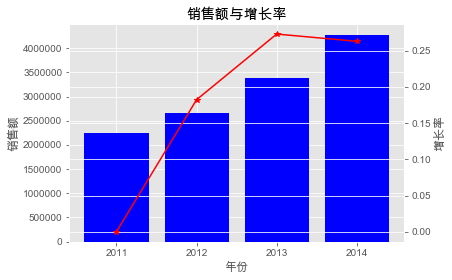

In [132]:
# 每年销售额的增长情况
sales_year = data.groupby(by='Order-year')['Sales'].sum()
print(sales_year)

sales_rate_12 = sales_year[2012] / sales_year[2011] - 1
sales_rate_13 = sales_year[2013] / sales_year[2012] - 1
sales_rate_14 = sales_year[2014] / sales_year[2013] - 1
print(sales_rate_12, sales_rate_13, sales_rate_14)

sales_rate_12_label = "%.2f%%" % (sales_rate_12 * 100)
sales_rate_13_label = "%.2f%%" % (sales_rate_13 * 100)
sales_rate_14_label = "%.2f%%" % (sales_rate_14 * 100)
print(sales_rate_12_label, sales_rate_13_label, sales_rate_14_label)

sales_rate = pd.DataFrame({
    'sales_all':
    sales_year,
    'sales_rate': [0, sales_rate_12, sales_rate_13, sales_rate_14],
    'sales_rate_label':
    ['0.00%', sales_rate_12_label, sales_rate_13_label, sales_rate_14_label]
})
print(sales_rate)

import matplotlib.pyplot as plt
import matplotlib as mpl
# 设置字体
mpl.rcParams['font.sans-serif'] = ['SimHei']     # win
plt.rcParams["font.family"] = 'Arial Unicode MS' # mac
# 设置风格
plt.style.use('ggplot')
sales_rate = pd.DataFrame({
    'sales_all':
    sales_year,
    'sales_rate': [0, sales_rate_12, sales_rate_13, sales_rate_14],
    'sales_rate_label':
    ['0.00%', sales_rate_12_label, sales_rate_13_label, sales_rate_14_label]
})
y1 = sales_rate['sales_all']
y2 = sales_rate['sales_rate']
x = [str(value) for value in sales_rate.index.tolist()]
# 新建figure对象
fig = plt.figure()
# 新建子图1
ax1 = fig.add_subplot(1, 1, 1)
# ax2与ax1共享X轴
ax2 = ax1.twinx()
ax1.bar(x, y1, color='blue')
ax2.plot(x, y2, marker='*', color='r')
ax1.set_xlabel('年份')
ax1.set_ylabel('销售额')
ax2.set_ylabel('增长率')
ax1.set_title('销售额与增长率')
plt.show()

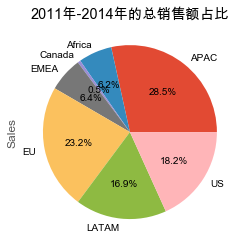

In [135]:
# 各个地区分店的销售额
sales_area = data.groupby(by='Market')['Sales'].sum()
sales_area.plot(kind='pie', autopct="%1.1f%%", title='2011年-2014年的总销售额占比')

In [134]:
# 各地区每一年的销售额
sales_area = data.groupby(by=['Market', 'Order-year'])['Sales'].sum()
# 将分组后的多层索引设置成列数据
sales_area = sales_area.reset_index(level=[0, 1])
# 使用数据透视表重新整理数据
sales_area = pd.pivot_table(sales_area,
                            index='Market',
                            columns='Order-year',
                            values='Sales')
sales_area

Order-year,2011,2012,2013,2014
Market,,,,
APAC,639285.99120,762669.96540,974861.9709,1.209074e+06
Africa,127157.21400,144531.09300,229052.2320,2.830364e+05
Canada,8509.11000,16096.80000,19161.1500,2.316111e+04
EMEA,136412.29200,163323.59700,204640.6830,3.015676e+05
EU,477484.33200,651984.77700,756180.6000,1.039217e+06
LATAM,381438.97248,456395.63084,600964.6738,6.957994e+05
US,484076.09010,470395.43300,608254.3660,7.336683e+05


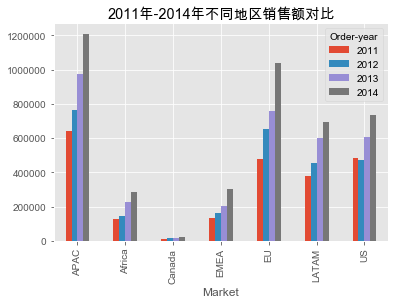

In [136]:
# 各地区每一年的销售额
sales_area = data.groupby(by=['Market', 'Order-year'])['Sales'].sum()
# 将分组后的多层索引设置成列数据
sales_area = sales_area.reset_index(level=[0, 1])
# 使用数据透视表重新整理数据
sales_area = pd.pivot_table(sales_area,
                            index='Market',
                            columns='Order-year',
                            values='Sales')
# 绘制图形
sales_area.plot(kind='bar', title='2011年-2014年不同地区销售额对比')

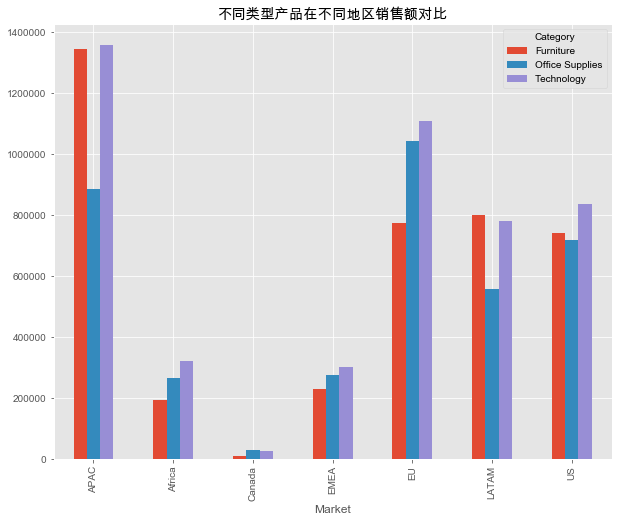

In [137]:
# 不同类型产品在不同地区销售额对比
category_sales_area = data.groupby(by=['Market', 'Category'])['Sales'].sum()
category_sales_area
# 将分组后的多层索引设置成列数据
category_sales_area = category_sales_area.reset_index(level=[0, 1])
# 使用数据透视表重新整理数据
category_sales_area = pd.pivot_table(category_sales_area,
                                     index='Market',
                                     columns='Category',
                                     values='Sales')
# 绘制图形
category_sales_area.plot(kind='bar', title='不同类型产品在不同地区销售额对比', figsize=(10, 8))

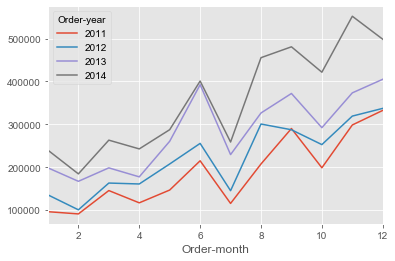

In [138]:
# 每年每月的销售额对比
year_month = data.groupby(by=['Order-year', 'Order-month'])['Sales'].sum()

# 将索引订单年转为一列数据
sales_year_month = year_month.reset_index(level=[0, 1])
# 利用透视表的确定销售额预览表
sales_year_month = pd.pivot_table(sales_year_month,
                                  index='Order-month',
                                  columns='Order-year',
                                  values='Sales')
# 绘制图形
sales_year_month.plot()

In [139]:
# 每年每个月产生新用户的对比
data_customer = data.copy()
data_customer = data_customer.drop_duplicates(subset=['CustomerID'])
new_customer = data_customer.groupby(by=['Order-year', 'Order-month']).size()
new_customer = new_customer.reset_index(level=[0, 1])
customer_year_month = pd.pivot_table(new_customer,
                                     index='Order-month',
                                     columns='Order-year',
                                     values=0,
                                     fill_value=0)

customer_year_month

Order-year,2011,2012,2013,2014
Order-month,,,,
1,197,25,5,3
2,139,14,6,3
3,173,18,8,0
4,143,16,5,1
5,114,11,4,0
6,151,28,6,6
7,64,9,4,2
8,106,28,7,0
9,85,22,4,0


(17475, 3)


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

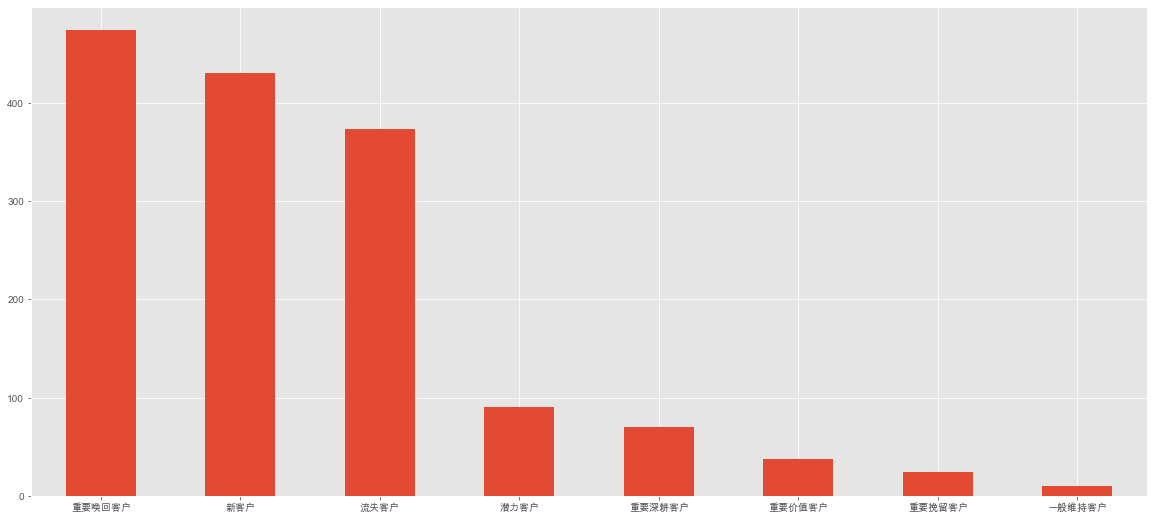

In [140]:
# 获取2014年数据
data_14 = data[data['Order-year'] == 2014]

# orderData：看到上一次什么时间购买，消费频率
# sales:消费金额
data_14 = data_14[['CustomerID', 'OrderDate', 'Sales']]
print(data_14.shape)
customdf = data_14.copy()

customdf.set_index('CustomerID', drop=True, inplace=True)

customdf['orders'] = 1
# 2014 8 - 30  2014-8-1
rfmdf = customdf.pivot_table(index=['CustomerID'],
                             values=['OrderDate', 'orders', 'Sales'],
                             aggfunc={
                                 'OrderDate': 'max',
                                 'orders': 'sum',
                                 'Sales': 'sum'
                             })
rfmdf['R'] = (rfmdf.OrderDate.max() - rfmdf.OrderDate).dt.days
rfmdf.rename(columns={'Sales': 'M', 'orders': 'F'}, inplace=True)
rfmdf

def rfm_func(x):
    level = x.apply(lambda x: "1" if x >= 1 else '0')
    label = level.R + level.F + level.M
    d = {
        '111': '重要价值客户',
        '011': '重要唤回客户',
        '001': '重要深耕客户',
        '101': '重要挽留客户',
        '010': '潜力客户',
        '110': '一般维持客户',
        '000': '新客户',
        '100': '流失客户'
    }
    result = d[label]
    return result

# 8 6 7    100  10  50
rfmdf['label'] = rfmdf[['R', 'F',
                        'M']].apply(lambda x: x - x.mean()).apply(rfm_func,
                                                                  axis=1)
rfmdf.groupby('label').count()

rfmdf.label.value_counts().plot.bar(figsize=(20, 9))
plt.xticks(rotation=0)

In [141]:
custom_grade_df = data_14.copy()
custom_grade_df


# 排序函数
def order_sort(group):
    return group.sort_values(by='OrderDate')[-1:]


# 将数据按客户ID分组
data_14_group = data_14.groupby(by='CustomerID', as_index=False)
# 将每个分组对象的数据排序，并取出日期最大的数据
data_max_time = data_14_group.apply(order_sort)
print(data_max_time)

           CustomerID  OrderDate      Sales
0    50439   AA-10315 2014-12-23    45.9900
1    50605   AA-10375 2014-12-25   444.4200
2    43054   AA-10480 2014-08-28    27.8190
3    49133   AA-10645 2014-12-03    43.2957
4    50872     AA-315 2014-12-29    20.0520
...               ...        ...        ...
1505 50393   YS-21880 2014-12-22  1000.0200
1506 39455   ZC-11910 2014-06-14     7.1730
1507 50843   ZC-21910 2014-12-28   237.3300
1508 50838   ZD-11925 2014-12-28     8.7600
1509 51032   ZD-21925 2014-12-30   216.0000

[1510 rows x 3 columns]


In [142]:
# 为数据添加F列
data_max_time['F'] = data_14_group.size().values
# 为数据添加M列
data_max_time['M'] = data_14_group.sum()['Sales'].values
print(data_max_time)

           CustomerID  OrderDate      Sales   F          M
0    50439   AA-10315 2014-12-23    45.9900  17  3889.2065
1    50605   AA-10375 2014-12-25   444.4200  14  1904.5380
2    43054   AA-10480 2014-08-28    27.8190  10  7752.9070
3    49133   AA-10645 2014-12-03    43.2957  19  3539.8788
4    50872     AA-315 2014-12-29    20.0520   3   787.3920
...               ...        ...        ...  ..        ...
1505 50393   YS-21880 2014-12-22  1000.0200  19  7282.4740
1506 39455   ZC-11910 2014-06-14     7.1730   1     7.1730
1507 50843   ZC-21910 2014-12-28   237.3300  27  4922.8390
1508 50838   ZD-11925 2014-12-28     8.7600   8   856.2600
1509 51032   ZD-21925 2014-12-30   216.0000   6  2029.9389

[1510 rows x 5 columns]


In [143]:
# 确定统计日期
stat_date = pd.to_datetime('2014-12-31')
# 计算最近一次交易时间的间隔
r_data = stat_date - data_max_time['OrderDate']
# 为数据添加R列
data_max_time['R'] = r_data.values
print(data_max_time)

           CustomerID  OrderDate      Sales   F          M        R
0    50439   AA-10315 2014-12-23    45.9900  17  3889.2065   8 days
1    50605   AA-10375 2014-12-25   444.4200  14  1904.5380   6 days
2    43054   AA-10480 2014-08-28    27.8190  10  7752.9070 125 days
3    49133   AA-10645 2014-12-03    43.2957  19  3539.8788  28 days
4    50872     AA-315 2014-12-29    20.0520   3   787.3920   2 days
...               ...        ...        ...  ..        ...      ...
1505 50393   YS-21880 2014-12-22  1000.0200  19  7282.4740   9 days
1506 39455   ZC-11910 2014-06-14     7.1730   1     7.1730 200 days
1507 50843   ZC-21910 2014-12-28   237.3300  27  4922.8390   3 days
1508 50838   ZD-11925 2014-12-28     8.7600   8   856.2600   3 days
1509 51032   ZD-21925 2014-12-30   216.0000   6  2029.9389   1 days

[1510 rows x 6 columns]


In [144]:
section_list_F = [0, 5, 10, 15, 20, 50]
# 根据区间设置评分
grade_F = pd.cut(data_max_time['F'],
                 bins=section_list_F,
                 labels=[1, 2, 3, 4, 5])
# 添加FS评分列
data_max_time['F_S'] = grade_F.values

# 设置M维度的评分
section_list_M = [0, 500, 1000, 5000, 10000, 30000]
# 根据区间设置评分
grade_M = pd.cut(data_max_time['M'],
                 bins=section_list_M,
                 labels=[1, 2, 3, 4, 5])
# 添加MS评分列
data_max_time['M_S'] = grade_M.values

# 设置R维度的评分
import datetime
section_list_R = [
    datetime.timedelta(days=i) for i in [-1, 32, 93, 186, 277, 365]
]
# 根据区间设置评分
grade_R = pd.cut(data_max_time['R'],
                 bins=section_list_R,
                 labels=[5, 4, 3, 2, 1])
# 添加RS评分列
data_max_time['R_S'] = grade_R.values

data_max_time

,,CustomerID,OrderDate,Sales,F,M,R,F_S,M_S,R_S
0,50439,AA-10315,2014-12-23,45.9900,17,3889.2065,8 days,4,3,5
1,50605,AA-10375,2014-12-25,444.4200,14,1904.5380,6 days,3,3,5
2,43054,AA-10480,2014-08-28,27.8190,10,7752.9070,125 days,2,4,3
3,49133,AA-10645,2014-12-03,43.2957,19,3539.8788,28 days,4,3,5
4,50872,AA-315,2014-12-29,20.0520,3,787.3920,2 days,1,2,5
...,...,...,...,...,...,...,...,...,...,...
1505,50393,YS-21880,2014-12-22,1000.0200,19,7282.4740,9 days,4,4,5
1506,39455,ZC-11910,2014-06-14,7.1730,1,7.1730,200 days,1,1,2
1507,50843,ZC-21910,2014-12-28,237.3300,27,4922.8390,3 days,5,3,5
1508,50838,ZD-11925,2014-12-28,8.7600,8,856.2600,3 days,2,2,5


In [145]:
# 设置F维度高低值
data_max_time['F_S'] = data_max_time['F_S'].values.astype('int')
# 根据评分平均分设置判别高低
grade_avg = data_max_time['F_S'].values.sum() / data_max_time['F_S'].count()
# 将高对应为1，低设置为0
data_F_S = data_max_time['F_S'].where(data_max_time['F_S'] > grade_avg, 0)
data_max_time['F_high-low'] = data_F_S.where(data_max_time['F_S'] < grade_avg,
                                             1).values

# 设置M维度高低值
data_max_time['M_S'] = data_max_time['M_S'].values.astype('int')
# 根据评分平均分设置判别高低
grade_avg = data_max_time['M_S'].values.sum() / data_max_time['M_S'].count()
# 将高对应为1，低设置为0
data_M_S = data_max_time['M_S'].where(data_max_time['M_S'] > grade_avg, 0)
data_max_time['M_high-low'] = data_M_S.where(data_max_time['M_S'] < grade_avg,
                                             1).values

# 设置R维度高低值
data_max_time['R_S'] = data_max_time['R_S'].values.astype('int')
# 根据评分平均分设置判别高低
grade_avg = data_max_time['R_S'].values.sum() / data_max_time['R_S'].count()
# 将高对应为1，低设置为0
data_R_S = data_max_time['R_S'].where(data_max_time['R_S'] < grade_avg, 0)
data_max_time['R_high-low'] = data_R_S.where(data_max_time['R_S'] > grade_avg,
                                             1).values

# 截取部分列数据
data_rfm = data_max_time[[
    'CustomerID', 'R_high-low', 'F_high-low', 'M_high-low'
]]
data_rfm

,,CustomerID,R_high-low,F_high-low,M_high-low
0,50439,AA-10315,0,1,1
1,50605,AA-10375,0,1,1
2,43054,AA-10480,1,0,1
3,49133,AA-10645,0,1,1
4,50872,AA-315,0,0,0
...,...,...,...,...,...
1505,50393,YS-21880,0,1,1
1506,39455,ZC-11910,1,0,0
1507,50843,ZC-21910,0,1,1
1508,50838,ZD-11925,0,0,0


In [146]:
custom_grade_df = data_14.copy()
custom_grade_df


# 排序函数
def order_sort(group):
    return group.sort_values(by='OrderDate')[-1:]


# 将数据按客户ID分组
data_14_group = data_14.groupby(by='CustomerID', as_index=False)
# 将每个分组对象的数据排序，并取出日期最大的数据
data_max_time = data_14_group.apply(order_sort)
print(data_max_time)

# 为数据添加F列
data_max_time['F'] = data_14_group.size().values
# 为数据添加M列
data_max_time['M'] = data_14_group.sum()['Sales'].values
print(data_max_time)

# 确定统计日期
stat_date = pd.to_datetime('2014-12-31')
# 计算最近一次交易时间的间隔
r_data = stat_date - data_max_time['OrderDate']
# 为数据添加R列
data_max_time['R'] = r_data.values
print(data_max_time)

section_list_F = [0, 5, 10, 15, 20, 50]
# 根据区间设置评分
grade_F = pd.cut(data_max_time['F'],
                 bins=section_list_F,
                 labels=[1, 2, 3, 4, 5])
# 添加FS评分列
data_max_time['F_S'] = grade_F.values

# 设置M维度的评分
section_list_M = [0, 500, 1000, 5000, 10000, 30000]
# 根据区间设置评分
grade_M = pd.cut(data_max_time['M'],
                 bins=section_list_M,
                 labels=[1, 2, 3, 4, 5])
# 添加MS评分列
data_max_time['M_S'] = grade_M.values

# 设置R维度的评分
import datetime
section_list_R = [
    datetime.timedelta(days=i) for i in [-1, 32, 93, 186, 277, 365]
]
# 根据区间设置评分
grade_R = pd.cut(data_max_time['R'],
                 bins=section_list_R,
                 labels=[5, 4, 3, 2, 1])
# 添加RS评分列
data_max_time['R_S'] = grade_R.values

# 设置F维度高低值
data_max_time['F_S'] = data_max_time['F_S'].values.astype('int')
# 根据评分平均分设置判别高低
grade_avg = data_max_time['F_S'].values.sum() / data_max_time['F_S'].count()
# 将高对应为1，低设置为0
data_F_S = data_max_time['F_S'].where(data_max_time['F_S'] > grade_avg, 0)
data_max_time['F_high-low'] = data_F_S.where(data_max_time['F_S'] < grade_avg,
                                             1).values

# 设置M维度高低值
data_max_time['M_S'] = data_max_time['M_S'].values.astype('int')
# 根据评分平均分设置判别高低
grade_avg = data_max_time['M_S'].values.sum() / data_max_time['M_S'].count()
# 将高对应为1，低设置为0
data_M_S = data_max_time['M_S'].where(data_max_time['M_S'] > grade_avg, 0)
data_max_time['M_high-low'] = data_M_S.where(data_max_time['M_S'] < grade_avg,
                                             1).values

# 设置R维度高低值
data_max_time['R_S'] = data_max_time['R_S'].values.astype('int')
# 根据评分平均分设置判别高低
grade_avg = data_max_time['R_S'].values.sum() / data_max_time['R_S'].count()
# 将高对应为1，低设置为0
data_R_S = data_max_time['R_S'].where(data_max_time['R_S'] < grade_avg, 0)
data_max_time['R_high-low'] = data_R_S.where(data_max_time['R_S'] > grade_avg,
                                             1).values

# 截取部分列数据
data_rfm = data_max_time[[
    'CustomerID', 'R_high-low', 'F_high-low', 'M_high-low'
]]


def get_sum_value(series):
    return ''.join([str(i) for i in series.values.tolist()[1:]])


# 添加RFM字符串列
data_rfm['data_rfm'] = data_rfm.apply(get_sum_value, axis=1)
dic = {
    '111': '重要价值客户',
    '101': '重要深耕客户',
    '011': '重要唤回客户',
    '001': '重要挽留客户',
    '110': '潜力客户',
    '100': '新客户',
    '010': '一般维持客户',
    '000': '流失客户',
}
# RFM字符串数据映射成对应类型文字
data_rfm['data_rfm'] = data_rfm['data_rfm'].map(dic)
# print(data_rfm)

size = data_rfm.groupby(by='data_rfm').size()
size = size.to_frame()
size['rfm_pct'] = [
    "%.2f%%" % (i / sum(size.values) * 100) for i in size.values
]
size

           CustomerID  OrderDate      Sales
0    50439   AA-10315 2014-12-23    45.9900
1    50605   AA-10375 2014-12-25   444.4200
2    43054   AA-10480 2014-08-28    27.8190
3    49133   AA-10645 2014-12-03    43.2957
4    50872     AA-315 2014-12-29    20.0520
...               ...        ...        ...
1505 50393   YS-21880 2014-12-22  1000.0200
1506 39455   ZC-11910 2014-06-14     7.1730
1507 50843   ZC-21910 2014-12-28   237.3300
1508 50838   ZD-11925 2014-12-28     8.7600
1509 51032   ZD-21925 2014-12-30   216.0000

[1510 rows x 3 columns]
           CustomerID  OrderDate      Sales   F          M
0    50439   AA-10315 2014-12-23    45.9900  17  3889.2065
1    50605   AA-10375 2014-12-25   444.4200  14  1904.5380
2    43054   AA-10480 2014-08-28    27.8190  10  7752.9070
3    49133   AA-10645 2014-12-03    43.2957  19  3539.8788
4    50872     AA-315 2014-12-29    20.0520   3   787.3920
...               ...        ...        ...  ..        ...
1505 50393   YS-21880 2014-12-22  

/Users/seven/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/seven/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,0,rfm_pct
data_rfm,,
一般维持客户,8,0.53%
新客户,402,26.62%
流失客户,145,9.60%
潜力客户,5,0.33%
重要价值客户,229,15.17%
重要唤回客户,471,31.19%
重要挽留客户,111,7.35%
重要深耕客户,139,9.21%


END------------------

### 4.5 决策树-用户分层

In [147]:
data_rfm

,,CustomerID,R_high-low,F_high-low,M_high-low,data_rfm
0,50439,AA-10315,0,1,1,重要唤回客户
1,50605,AA-10375,0,1,1,重要唤回客户
2,43054,AA-10480,1,0,1,重要深耕客户
3,49133,AA-10645,0,1,1,重要唤回客户
4,50872,AA-315,0,0,0,流失客户
...,...,...,...,...,...,...
1505,50393,YS-21880,0,1,1,重要唤回客户
1506,39455,ZC-11910,1,0,0,新客户
1507,50843,ZC-21910,0,1,1,重要唤回客户
1508,50838,ZD-11925,0,0,0,流失客户


In [148]:
pd.DataFrame(data_rfm['data_rfm'])

,,data_rfm
0,50439,重要唤回客户
1,50605,重要唤回客户
2,43054,重要深耕客户
3,49133,重要唤回客户
4,50872,流失客户
...,...,...
1505,50393,重要唤回客户
1506,39455,新客户
1507,50843,重要唤回客户
1508,50838,流失客户


In [149]:
data_max_time['data_rfm'] = data_rfm['data_rfm']
data_max_time

,,CustomerID,OrderDate,Sales,F,M,R,F_S,M_S,R_S,F_high-low,M_high-low,R_high-low,data_rfm
0,50439,AA-10315,2014-12-23,45.9900,17,3889.2065,8 days,4,3,5,1,1,0,重要唤回客户
1,50605,AA-10375,2014-12-25,444.4200,14,1904.5380,6 days,3,3,5,1,1,0,重要唤回客户
2,43054,AA-10480,2014-08-28,27.8190,10,7752.9070,125 days,2,4,3,0,1,1,重要深耕客户
3,49133,AA-10645,2014-12-03,43.2957,19,3539.8788,28 days,4,3,5,1,1,0,重要唤回客户
4,50872,AA-315,2014-12-29,20.0520,3,787.3920,2 days,1,2,5,0,0,0,流失客户
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,50393,YS-21880,2014-12-22,1000.0200,19,7282.4740,9 days,4,4,5,1,1,0,重要唤回客户
1506,39455,ZC-11910,2014-06-14,7.1730,1,7.1730,200 days,1,1,2,0,0,1,新客户
1507,50843,ZC-21910,2014-12-28,237.3300,27,4922.8390,3 days,5,3,5,1,1,0,重要唤回客户
1508,50838,ZD-11925,2014-12-28,8.7600,8,856.2600,3 days,2,2,5,0,0,0,流失客户


In [150]:
new_df = data_max_time[['F','M','R','data_rfm']]
new_df


,,F,M,R,data_rfm
0,50439,17,3889.2065,8 days,重要唤回客户
1,50605,14,1904.5380,6 days,重要唤回客户
2,43054,10,7752.9070,125 days,重要深耕客户
3,49133,19,3539.8788,28 days,重要唤回客户
4,50872,3,787.3920,2 days,流失客户
...,...,...,...,...,...
1505,50393,19,7282.4740,9 days,重要唤回客户
1506,39455,1,7.1730,200 days,新客户
1507,50843,27,4922.8390,3 days,重要唤回客户
1508,50838,8,856.2600,3 days,流失客户


In [151]:
new_df.reset_index(drop=True,inplace=True)
new_df

,F,M,R,data_rfm
0,17,3889.2065,8 days,重要唤回客户
1,14,1904.5380,6 days,重要唤回客户
2,10,7752.9070,125 days,重要深耕客户
3,19,3539.8788,28 days,重要唤回客户
4,3,787.3920,2 days,流失客户
...,...,...,...,...
1505,19,7282.4740,9 days,重要唤回客户
1506,1,7.1730,200 days,新客户
1507,27,4922.8390,3 days,重要唤回客户
1508,8,856.2600,3 days,流失客户


In [152]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 4 columns):
F           1510 non-null int64
M           1510 non-null float64
R           1510 non-null timedelta64[ns]
data_rfm    1510 non-null object
dtypes: float64(1), int64(1), object(1), timedelta64[ns](1)
memory usage: 47.3+ KB


In [153]:
new_df['R'].loc[0].days

8

In [154]:
new_df['R'] = new_df['R'].apply(lambda x: x.days)

/Users/seven/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [155]:
new_df['R'].values

array([  8,   6, 125, ...,   3,   3,   1])

In [156]:
# 获取数据
from sklearn.tree import DecisionTreeClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz


In [157]:
from sklearn.model_selection import train_test_split
data_x = new_df.drop(['data_rfm'], axis=1)
data_y = new_df['data_rfm']
train_x, test_x, train_y, test_y = train_test_split(data_x,
                                                    data_y,
                                                    test_size=0.2,
                                                    random_state=8)

train_x

,F,M,R
300,15,5986.2625,15
1344,1,21.1200,169
529,8,5183.5200,22
461,3,670.4760,111
955,1,28.9800,48
...,...,...,...
986,8,1165.7100,40
133,9,972.1700,9
361,25,8351.8480,7
1364,8,830.7000,95


In [158]:
train_x.shape

(1208, 3)

In [161]:
# 使用决策树算法
clf = DecisionTreeClassifier(criterion='gini',
                             max_depth=3,
                             min_samples_leaf=5,
                             min_samples_split=2,
                             random_state=0)
clf.fit(train_x, train_y)
score = clf.score(test_x, test_y)
score

0.9966887417218543

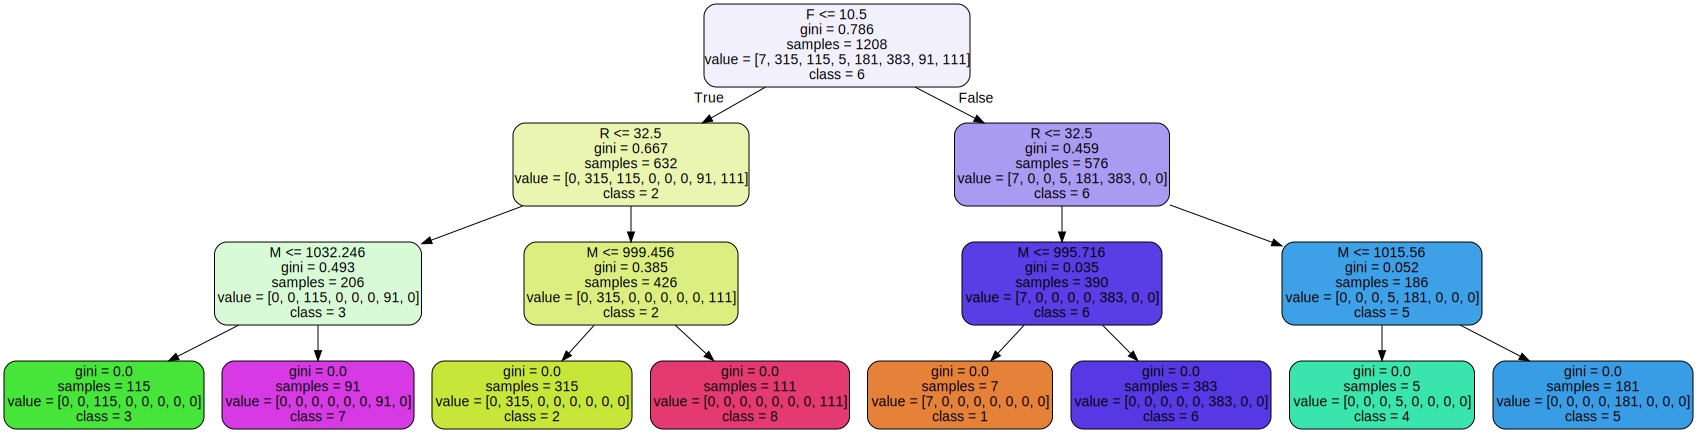

In [111]:
import os

plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文标签
plt.rcParams["font.family"] = 'Arial Unicode MS'  # mac
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号
from sklearn import tree
import graphviz
#颜色越浅，不纯度越高
dot = tree.export_graphviz(clf,# DT
                           feature_names=train_x.columns,# RFM
                           class_names=['1', '2','3','4','5','6','7','8'],# 
                           filled=True,
                           rounded=True)

graph = graphviz.Source(dot)
graph